In [13]:
import math
from collections import Counter, defaultdict
from functools import partial
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, \
                            classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.style.use("fivethirtyeight")

Dataset : Personal Key Indicators for Health Disease

Dataset ini merupakan data survei CDC tahun 2020 dari 400k orang dewasa yang berkaitan dengan kondisi kesehatan mereka. Dengan menggunakan dataset ini, kita akan membuat sebuah model untuk mengklasifikasikan apakah seseorang dengan kondisi kesehatan tertentu memiliki sakit jantung atau tidak yang direpresentasikan oleh fitur HeartDisease.

In [19]:
df_heart = pd.read_csv ("Data jantung.csv")
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [20]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [28]:
#Cek tipe data

type (df_heart)

pandas.core.frame.DataFrame

# Exploratory Data Analysis


**Data Dictionary**:

| column | description |
| ------ | ----------- |
| `HeartDisease` | Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI) |
| `BMI` | Body Mass Index (BMI) |
| `Smoking` | Have you smoked at least 100 cigarettes in your entire life? *(Note: 5 packs = 100 cigarettes)* |
| `AlcoholDrinking` | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week |
| `Stroke` | (Ever told) (you had) a stroke? |
| `PhysicalHealth` | Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 |
| `MentalHealth` | Thinking about your mental health, for how many days during the past 30 days was your mental health not good? |
| `DiffWalking` | Do you have serious difficulty walking or climbing stairs? |
| `Sex` | Are you male of female |
| `AgeCategory` | Fourteen-level age category |
| `Race` | Imputed race/ethnicity value |
| `Diabetic` | (Ever told) (you had) diabetes? |
| `PhysicalActivity` | Adults who reported doing physical activity or exercise during the past 30 days other than their regular job |
| `GenHealth` | Would you say that in general your health is... |
| `SleepTime` | On average, how many hours of sleep do you get in a 24-hour period? |
| `Asthma` | (Ever told) (you had) asthma? |
| `KidneyDisease` | Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease? |
| `SkinCancer` | (Ever told) (you had) skin cancer? |

In [25]:
numerical_features = df_heart.select_dtypes(include="number").columns.tolist()
categorical_features = df_heart.select_dtypes(include="object").columns.tolist()

print("Numerical features:")
pprint(numerical_features)

print("-------------------------------------------------------------------------------")

print("Categorical features:")
pprint(categorical_features, compact=True)

Numerical features:
['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
-------------------------------------------------------------------------------
Categorical features:
['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex',
 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma',
 'KidneyDisease', 'SkinCancer']


###### Summary Statistic

In [26]:
df_heart[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [29]:
df_heart[categorical_features].describe().T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


Dari summary di atas:

-Median dari PhysicalHealth dan MentalHealth lebih kecil daripada rata-rata nya, sehingga kemungkinan distribusinya left-skewed

-Kebanyakan nilai PhysicalHealth dan MentalHealth antara 0 sampai 3 (dari Q1 sampai Q3), sehingga kemungkinan terdapat banyak pencilan

-Ada baris yang nilai SleepTime nya 24 jam, apakah ini berarti ia tidur selama seharian?

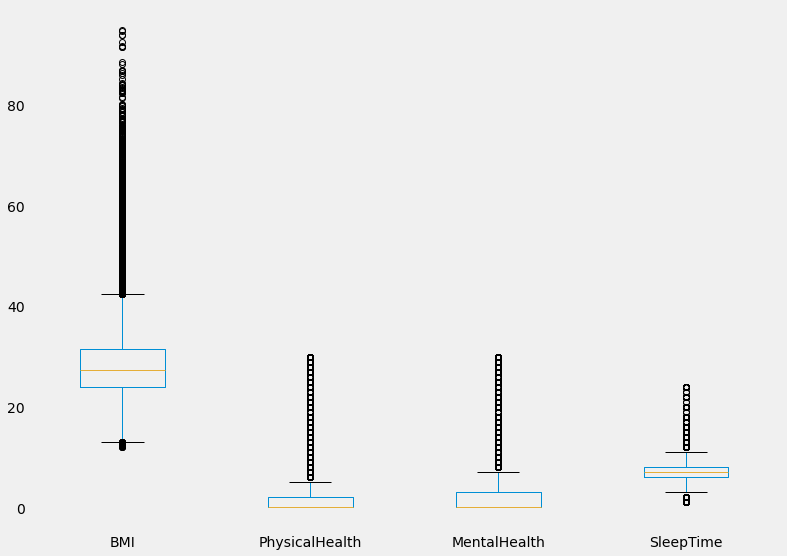

In [44]:
df_heart[numerical_features].plot(kind="box", figsize=(12, 9))
plt.grid(False)


In [35]:
df_heart[categorical_features].describe().T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


###### Correlation



In [54]:
df_heart.corr()

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


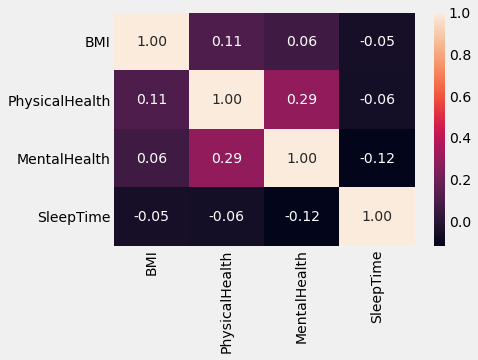

In [50]:
#Visualisasi terhadap korelasi

sns.heatmap(df_heart.corr(), annot=True, fmt=".2f")
plt.show()

###### EDA on Categorical Features

In [47]:


print(df_heart[categorical_features].head())

print("--------------------------")
print("Unique Value")
print("--------------------------")

print(df_heart[categorical_features].nunique())

  HeartDisease Smoking AlcoholDrinking Stroke DiffWalking     Sex  \
0           No     Yes              No     No          No  Female   
1           No      No              No    Yes          No  Female   
2           No     Yes              No     No          No    Male   
3           No      No              No     No          No  Female   
4           No      No              No     No         Yes  Female   

   AgeCategory   Race Diabetic PhysicalActivity  GenHealth Asthma  \
0        55-59  White      Yes              Yes  Very good    Yes   
1  80 or older  White       No              Yes  Very good     No   
2        65-69  White      Yes              Yes       Fair    Yes   
3        75-79  White       No               No       Good     No   
4        40-44  White       No              Yes  Very good     No   

  KidneyDisease SkinCancer  
0            No        Yes  
1            No         No  
2            No         No  
3            No        Yes  
4            No         N

##### Count of Unique Values

 

In [48]:

for feature in categorical_features:
    print(df_heart[feature].value_counts())

No     292422
Yes     27373
Name: HeartDisease, dtype: int64
No     187887
Yes    131908
Name: Smoking, dtype: int64
No     298018
Yes     21777
Name: AlcoholDrinking, dtype: int64
No     307726
Yes     12069
Name: Stroke, dtype: int64
No     275385
Yes     44410
Name: DiffWalking, dtype: int64
Female    167805
Male      151990
Name: Sex, dtype: int64
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: AgeCategory, dtype: int64
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: Race, dtype: int64
No                         269653
Yes                         40802
No

In [71]:
pd.crosstab( index = df_heart["HeartDisease"] , columns = df_heart["Smoking"])

Smoking,No,Yes
HeartDisease,,
No,176551,115871
Yes,11336,16037


In [75]:
df_heart.groupby("HeartDisease")["AgeCategory"]. value_counts()

HeartDisease  AgeCategory
No            60-64          30359
              65-69          30050
              55-59          27555
              70-74          26218
              50-54          23999
              45-49          21047
              18-24          20934
              40-44          20520
              35-39          20254
              80 or older    18704
              30-34          18527
              75-79          17433
              25-29          16822
Yes           80 or older     5449
              70-74           4847
              65-69           4101
              75-79           4049
              60-64           3327
              55-59           2202
              50-54           1383
              45-49            744
              40-44            486
              35-39            296
              30-34            226
              25-29            133
              18-24            130
Name: AgeCategory, dtype: int64

##### Visualization

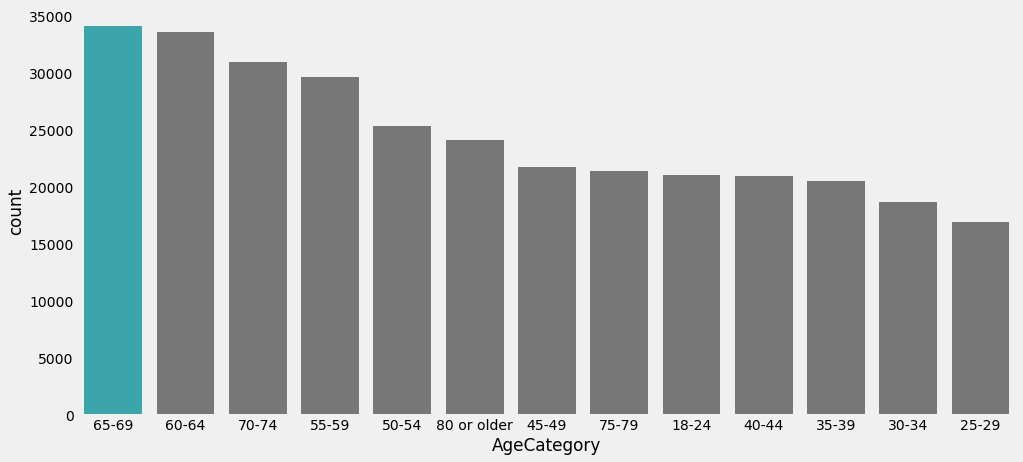

In [92]:
#Age Category

age_category_order = df_heart.AgeCategory.value_counts().index # Bikin index

plt.figure(figsize=(15, 7))
sns.countplot(
        x= "AgeCategory", 
        data=df_heart, 
         order=age_category_order,
         palette=["#29B5BF"] + (len(age_category_order)-1)*["#777777"])

plt.grid(False)
plt.show()

In [89]:
#Buat fungsi untuk memudkan visualisasi

def plot_count(x, data=df_heart, palette=None, figsize=(15, 7)):
    column_order = data[x].value_counts().index

    plt.figure(figsize=figsize)
    sns.countplot(
        x=x, data=data, order=column_order,
        palette=palette
    )
    plt.grid(False)
    plt.show()

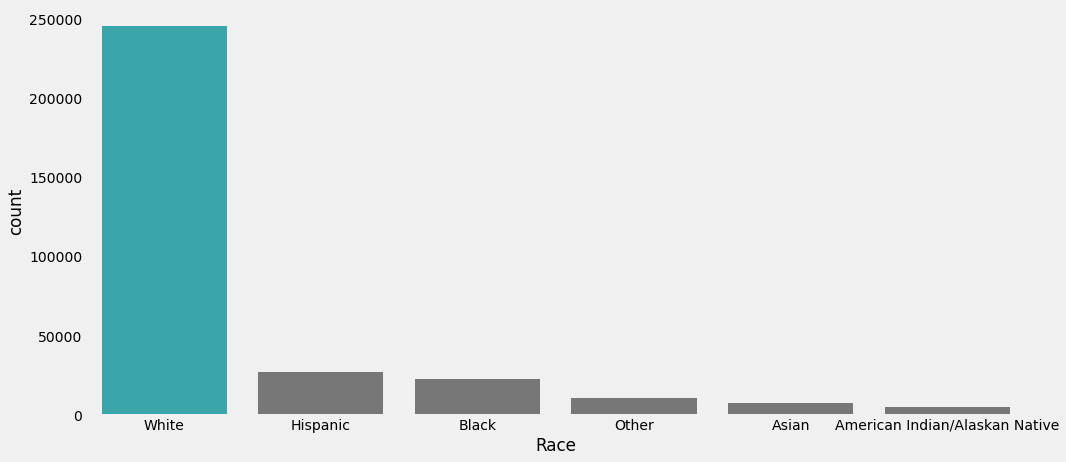

In [90]:
#Visualisasi race

race_order = df_heart["Race"].value_counts().index
plot_count("Race", palette=["#29B5BF"] + (len(race_order)-1)*["#777777"])

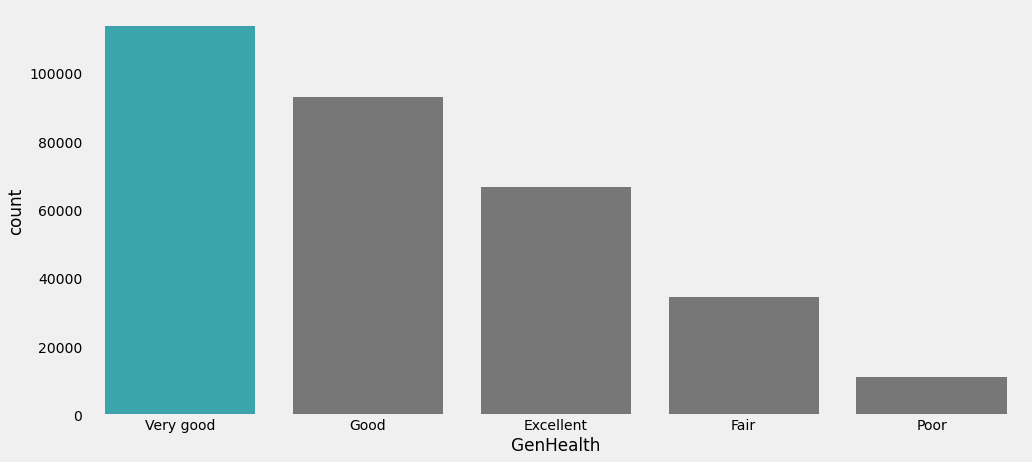

In [91]:
gen_health_order = df_heart["Race"].value_counts().index
plot_count(
    "GenHealth",
    palette=["#29B5BF"] + (len(gen_health_order)-1)*["#777777"]
)

##### MODEL DEVELOPMENT 

In [105]:
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


##### SPLITTING DATA

In [110]:


#Untuk memudahkan proses training, kita akan buat variabel X yang berisi semua fitur-fitur untuk melatih model 
#dan variabel y yang berisi target variabel.

X = df_heart.drop(columns=["HeartDisease"]).copy()
y = df_heart["HeartDisease"].copy()

In [111]:
#DataTrain : 0,9
#DataRest  : 0,1

X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.1, stratify=y, random_state=11)

#DataTrain : 0,5
#DataDev = DataRest  >>> Pembagian dari datarest pertama yang diatas
X_dev, X_test, y_dev, y_test = train_test_split(X_rest, y_rest, test_size=.5, stratify=y_rest, random_state=11)

print("training size:", X_train.shape[0])
print("dev size:", X_dev.shape[0])
print("test size:", X_test.shape[0])

training size: 287815
dev size: 15990
test size: 15990


In [ ]:
# CONTOH
# TRAIN : REST : TEST
# 60    :  30  :  10

#10/40 BUAT DAPETIN PERHITUNGAN DI BAGIAN KE-2

### Diperoleh:
data training sebanyak 287,815 baris

data development sebanyak 15,990 baris

data test sebanyak 15,990 baris

###### CATEGORICAL ENCODING

Fitur kategorik nominal, yaitu Race dan Sex akan diubah menjadi matriks one-hot, sedangkan fitur kategorik ordinal (sisa fitur kategorik lainnya) akan diubah ke dalam bentuk angka terurut

In [112]:
nominal_features = ["Race", "Sex"]
ordinal_features = X.select_dtypes( include="object" ).drop(columns=nominal_features).columns.tolist()

print("nominal features:", nominal_features)
print("ordinal features:")
pprint(ordinal_features, compact=True)

nominal features: ['Race', 'Sex']
ordinal features:
['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'AgeCategory',
 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease',
 'SkinCancer']


In [113]:
onehot = OneHotEncoder()
onehot.fit(X_train[nominal_features])
X_train_onehot = pd.DataFrame(
    onehot.transform(X_train[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_dev_onehot = pd.DataFrame(
    onehot.transform(X_dev[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
X_test_onehot = pd.DataFrame(
    onehot.transform(X_test[nominal_features]).toarray(),
    columns=onehot.get_feature_names_out()
)
print("one-hot matrix:")
display(X_train_onehot)

ordinal = OrdinalEncoder()
ordinal.fit(X_train[ordinal_features])
X_train_ordinal = pd.DataFrame(
    ordinal.transform(X_train[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_dev_ordinal = pd.DataFrame(
    ordinal.transform(X_dev[ordinal_features]),
    columns=ordinal.feature_names_in_
)
X_test_ordinal = pd.DataFrame(
    ordinal.transform(X_test[ordinal_features]),
    columns=ordinal.feature_names_in_
)
print("ordinal matrix:")
display(X_train_ordinal)

one-hot matrix:


,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Sex_Female,Sex_Male
0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
287810,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
287811,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
287812,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
287813,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


ordinal matrix:


,Smoking,AlcoholDrinking,Stroke,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,9.0,0.0,1.0,2.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,12.0,0.0,1.0,4.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
287810,1.0,1.0,0.0,0.0,2.0,0.0,1.0,4.0,1.0,0.0,0.0
287811,0.0,0.0,0.0,0.0,12.0,0.0,1.0,4.0,0.0,0.0,0.0
287812,1.0,0.0,0.0,0.0,8.0,0.0,1.0,4.0,0.0,0.0,0.0
287813,0.0,0.0,0.0,1.0,12.0,0.0,1.0,1.0,0.0,0.0,1.0


In [114]:
#Khusus untuk AgeCategory, kita perlu cek apakah encoding sudah sesuai dengan ekspektasi urutan rentang umur, 
#yaitu umur yang lebih muda direpresentasikan dengan angka yang lebih rendah juga.

# Sanity check - check order of the resulting encoding of AgeCategory feature
pd.concat(
    [X_train.AgeCategory.reset_index(drop=True), X_train_ordinal.AgeCategory],
    axis=1,
    ignore_index=True).groupby(1)[0].agg(set)

1
0.0           {18-24}
1.0           {25-29}
2.0           {30-34}
3.0           {35-39}
4.0           {40-44}
5.0           {45-49}
6.0           {50-54}
7.0           {55-59}
8.0           {60-64}
9.0           {65-69}
10.0          {70-74}
11.0          {75-79}
12.0    {80 or older}
Name: 0, dtype: object

##### DATA RESCALING

Kita akan menggunakan function StandardScaler dari scikit-learn sedemikian hingga nilai fitur-fitur numerik memiliki rata-rata 0 dan standar deviasi 1.
Tapi, sebelum itu, kita akan gabungan fitur numerik yang dengan fitur kategorik yang sudah diubah ke dalam bentuk numerik.
Perlu diperhatikan, untuk mencegah data leakage, kita akan melakukan fit pada data training saja.
Data leakage refers to a mistake make by the creator of a machine learning model in which they accidentally share information between the test and training data-sets 

In [117]:
#Penggabungan data dengan concat

X_train_combined = pd.concat(
    [X_train[numerical_features].reset_index(drop=True), X_train_onehot, X_train_ordinal],
    axis=1 
)
X_dev_combined = pd.concat(
    [X_dev[numerical_features].reset_index(drop=True), X_dev_onehot, X_dev_ordinal],
    axis=1
)
X_test_combined = pd.concat(
    [X_test[numerical_features].reset_index(drop=True), X_test_onehot, X_test_ordinal],
    axis=1
)

X_train_combined.head()

,BMI,PhysicalHealth,MentalHealth,SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,...,AlcoholDrinking,Stroke,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,23.23,0.0,7.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,9.0,0.0,0.0,1.0,1.0,1.0,0.0
1,31.32,2.0,0.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
2,27.40,0.0,0.0,8.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,9.0,0.0,1.0,2.0,0.0,0.0,0.0
3,28.12,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,12.0,0.0,1.0,4.0,0.0,0.0,1.0
4,23.17,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0


In [118]:
#Scaler

# (CODE UNTUK STD 1 & MEAN 0)

scaler = StandardScaler()
scaler.fit(X_train_combined)

X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_combined),
    columns=X_train_combined.columns
)
X_dev_scaled = pd.DataFrame(
    scaler.transform(X_dev_combined),
    columns=X_dev_combined.columns
)
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_combined),
    columns=X_test_combined.columns
)

with pd.option_context("display.max_columns", None):
    display(X_train_scaled.head())

,BMI,PhysicalHealth,MentalHealth,SleepTime,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Sex_Female,Sex_Male,Smoking,AlcoholDrinking,Stroke,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,-0.800865,-0.423539,0.392302,-1.461103,-0.128258,-0.161182,-0.277878,-0.306615,-0.187958,0.551539,0.951852,-0.951852,-0.837284,-0.269644,-0.19784,-0.401596,0.696455,-0.418921,-1.856446,-0.795960,2.537974,5.112936,-0.320418
1,0.470906,-0.171718,-0.489480,-1.461103,-0.128258,-0.161182,3.598695,-0.306615,-0.187958,-1.813109,0.951852,-0.951852,-0.837284,-0.269644,-0.19784,-0.401596,-1.826633,-0.418921,0.538664,1.158765,-0.394015,-0.195582,-0.320418
2,-0.145329,-0.423539,-0.489480,0.629343,-0.128258,-0.161182,-0.277878,-0.306615,5.320346,-1.813109,0.951852,-0.951852,1.194338,-0.269644,-0.19784,-0.401596,0.696455,-0.418921,0.538664,-0.144385,-0.394015,-0.195582,-0.320418
3,-0.032143,-0.423539,-0.489480,0.629343,-0.128258,-0.161182,-0.277878,-0.306615,-0.187958,0.551539,-1.050584,1.050584,-0.837284,-0.269644,-0.19784,-0.401596,1.537484,-0.418921,0.538664,1.158765,-0.394015,-0.195582,3.120924
4,-0.810297,-0.423539,-0.489480,0.629343,-0.128258,-0.161182,-0.277878,-0.306615,-0.187958,0.551539,0.951852,-0.951852,1.194338,-0.269644,-0.19784,-0.401596,0.976798,-0.418921,0.538664,-1.447535,-0.394015,-0.195582,-0.320418


###### Modeling

Kita akan menggunakan DecisionTreeClassifier dari scikit-learn. 
Ada beberapa (hyper)parameter yang bisa kita tentukan saat mendefisinikan model.

Sebagai awalan, kita akan menggunakan default parameter yang disediakan oleh scikit-learn apa adanya.

In [121]:
model_default = DecisionTreeClassifier(random_state=11)
model_default.fit(X_train_scaled, y_train)

preds_train = model_default.predict(X_train_scaled)
preds_dev = model_default.predict(X_dev_scaled)
preds_test = model_default.predict(X_test_scaled)

In [122]:
print("train prediction samples:\n", preds_train[:10])
print("train target samples:\n", y_train[:10].tolist())

train prediction samples:
 ['No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No']
train target samples:
 ['No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No']


In [123]:
print("dev prediction samples:\n", preds_dev[:10])
print("dev target samples:\n", y_dev[:10].tolist())

dev prediction samples:
 ['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No']
dev target samples:
 ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No']


In [124]:
print("test prediction samples:\n", preds_test[:10])
print("test target samples:\n", y_test[:10].tolist())

test prediction samples:
 ['No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No']
test target samples:
 ['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No']


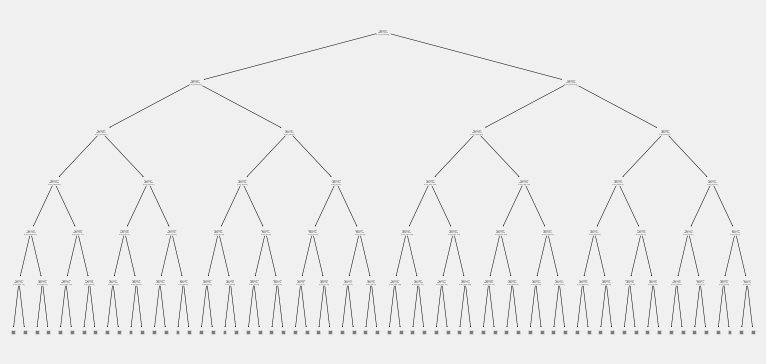

In [125]:
plt.figure(figsize=(12, 6))
plot_tree(model_default, max_depth=5)
plt.show()

###### MODEL EVALUATION

              precision    recall  f1-score   support

          No       1.00      1.00      1.00    263179
         Yes       1.00      0.96      0.98     24636

    accuracy                           1.00    287815
   macro avg       1.00      0.98      0.99    287815
weighted avg       1.00      1.00      1.00    287815



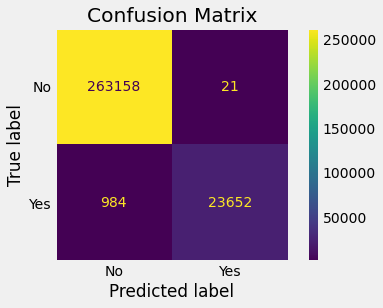

In [126]:
print(classification_report(y_train, preds_train))

ConfusionMatrixDisplay.from_predictions(y_train, preds_train)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#Precision  adalah TRUE POSITIF : TRUE POSITIF + FALSE POSITIF 
#Recall     adalah TRUE POSITIF : TRUE POSITIF + FALSE NEGATIF
#ACCURACY   adalah TRUE POSITIF + TRUE NEGATIF : 
#      ==>>        TRUE POSITIF + TRUE NEGATIF + FALSE POSITIF + FALSE NEGATIF 

Insights yang diperoleh dari evaluasi model pada data training adalah:

semua evaluation metrics sangat bagus, mulai dari accuracy, precision, recall, dan f1-score
dari 24,636 data yang berlabel Yes, model gagal memprediksi 984 data dengan benar (false negative). Ini berarti, ada 984 orang yang seharusnya memiliki riwayat penyakit jantung, tapi model mengklasifikan mereka sebagai orang sehat

In [127]:
263158 / (263158+984)

0.9962747310158929

              precision    recall  f1-score   support

          No       0.93      0.92      0.92     14622
         Yes       0.23      0.25      0.24      1368

    accuracy                           0.86     15990
   macro avg       0.58      0.58      0.58     15990
weighted avg       0.87      0.86      0.87     15990



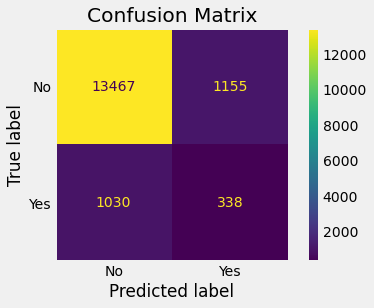

In [128]:
print(classification_report(y_dev, preds_dev))

ConfusionMatrixDisplay.from_predictions(y_dev, preds_dev)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#data development

              precision    recall  f1-score   support

          No       0.93      0.92      0.92     14621
         Yes       0.21      0.23      0.22      1369

    accuracy                           0.86     15990
   macro avg       0.57      0.58      0.57     15990
weighted avg       0.87      0.86      0.86     15990



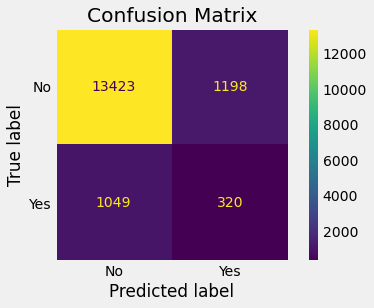

In [129]:
print(classification_report(y_test, preds_test))

ConfusionMatrixDisplay.from_predictions(y_test, preds_test)
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()

#data test

In [130]:
X.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [131]:
ordinal.feature_names_in_.tolist()

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'AgeCategory',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

In [132]:
numerical_features + onehot.get_feature_names_out().tolist() + ordinal.feature_names_in_.tolist()

['BMI',
 'PhysicalHealth',
 'MentalHealth',
 'SleepTime',
 'Race_American Indian/Alaskan Native',
 'Race_Asian',
 'Race_Black',
 'Race_Hispanic',
 'Race_Other',
 'Race_White',
 'Sex_Female',
 'Sex_Male',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'AgeCategory',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']